# Latam Data Engineer Challenge
---
## Configuración del Proyecto

### Entorno en Google Cloud Platform (GCP)

Para solventar el desafío, se configuró un entorno en Google Cloud Platform (GCP) con el nombre `development-latam-de`. Este entorno proporciona la infraestructura necesaria para manejar y procesar los datos del proyecto.

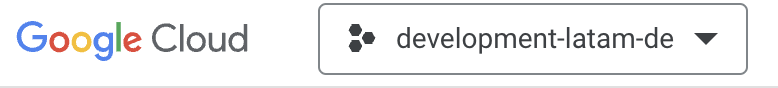

### Arquitectura de Medallón

En el contexto de la solución, se implementó una arquitectura de medallón, que organiza los datos en tres niveles distintos:

1. **Bronze (Bronce)**: Datos en su forma cruda y original, que se identificará por el inicio `raw`.
2. **Silver (Plata)**: Datos refinados y limpios, que se identificará por el inicio `cur`.
3. **Gold (Oro)**: Datos altamente curados y optimizados para análisis avanzados, que se identificará por el inicio `mst`.

Para este caso particular, se optó por crear tres carpetas dentro de un solo bucket en lugar de tres buckets separados. Esta estructura es ventajosa porque:

- **Facilita la organización y gestión de datos**: Cada nivel tiene sus propios datos claramente segregados.
- **Mejora la escalabilidad y mantenibilidad**: Es más fácil escalar y mantener el pipeline de datos cuando las etapas están bien definidas.
- **Optimiza las políticas de seguridad y acceso**: Permite aplicar diferentes políticas de acceso y seguridad a cada nivel de datos.
- **Aumenta el rendimiento de las consultas**: Al trabajar con datos más refinados en cada etapa, las consultas analíticas se vuelven más eficientes.

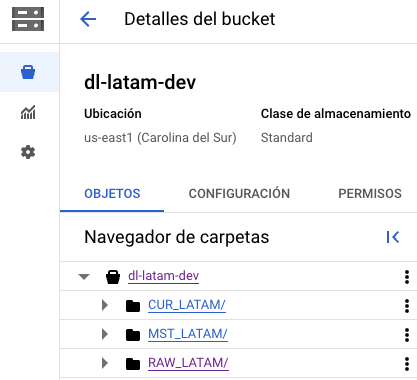

## Pipeline de Procesamiento e Ingesta de Datos

Se definió un pipeline que automatiza el proceso de creación de archivos curados y master. Este pipeline toma los datos crudos en formato `json` desde el bucket que se considera la data `raw`y los procesa adecuadamente.

Este archivo se encuentra en `src/create_medallion_pipeline.py`, mientras que el proceso que ejecuta el workflow desde Github Actions `.github/workflows/ingest_pipeline.yml`

### Descripción general de `create_medallion_pipeline`

#### Creación de Clientes de GCP
- Se crean clientes de GCS y BigQuery mediante create_gcp_clients.
- En caso de error, se captura y se imprime el mensaje de error.

#### Lectura de JSON desde GCS
- La función read_json_from_gcs lee un archivo JSON desde GCS y lo decodifica.
- Verifica la existencia del archivo y maneja errores durante la lectura.

### Conversión de JSON a DataFrame
- La función json_lines_to_dataframe convierte las líneas JSON en un DataFrame de Pandas.
- Se manejan errores de conversión y se imprime un mensaje de error si ocurre alguno.

#### Limpieza y Preparación de Datos
- Se renombra columnas para evitar problemas con nombres que contienen puntos y otros caracteres especiales.
- Se convierten todas las columnas de tipo object a cadenas de texto.
- Almacenamiento en Formato Parquet Los datos se guardan en formato Parquet, un formato de archivo columnar eficiente para análisis.
- Se maneja la subida de los archivos Parquet a GCS y se capturan posibles errores durante el proceso.
- Selección de Columnas y Creación de Archivo Final
- Se seleccionan columnas específicas del DataFrame para crear una versión "Gold" de los datos. Esta versión final también se guarda y se sube a GCS en formato Parquet.

### Descripción general de `ingest_pipeline.yml`

El pipeline se ejecuta manualmente utilizando GitHub Actions, lo cual ofrece varias ventajas:

- **Automatización**: Garantiza que los procesos de ETL (Extracción, Transformación y Carga) sean automáticos y repetibles.
- **Facilidad de uso**: GitHub Actions permite configurar y ejecutar workflows de manera sencilla.

#### Activación Manual
- El flujo de trabajo solo se activa cuando se dispara manualmente desde la interfaz de usuario de GitHub.

#### Configuración del Entorno
- Se configura un entorno de ejecución en Ubuntu usando la versión específica de Python (3.11).

#### Instalación de Dependencias
- Se instalan las dependencias del proyecto especificadas en el archivo requirements.txt utilizando pip.

#### Ejecución del Script
- Se ejecuta el script de Python create_medallion_pipeline.py ubicado en la carpeta src.

A conitnuación se presentan como se ven las salidas dentro de Github Actions

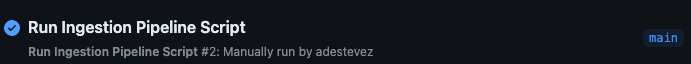
El tiempo estimado de ejecución es de 47 segundos
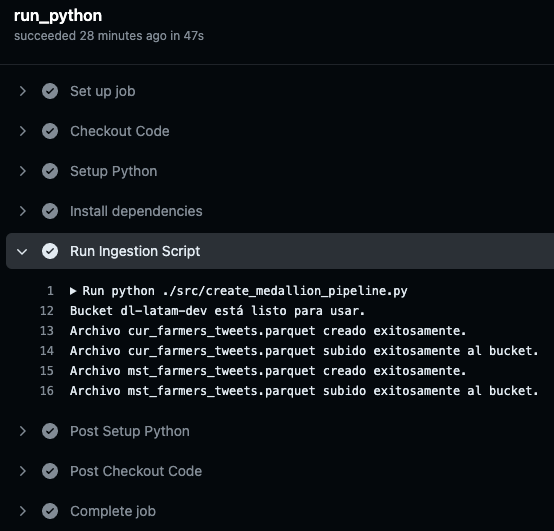

## Configuración del Entorno Colab

Para configurar el entorno de Google Colab para el proyecto `challenge_de_latam`, se ejecutan varios pasos que son cruciales para preparar el entorno de desarrollo. A continuación, se explican cada uno de estos pasos y su propósito.

### Montaje de Google Drive
Primero, se monta Google Drive en el entorno de Colab. Esto permite acceder a los archivos almacenados en Google Drive directamente desde el entorno Colab que previamente debieron ser clonados como se menciona en el README.md, facilitando la carga y manipulación de datos, así como el acceso a scripts y recursos necesarios para el proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Navegación al Directorio del Proyecto

Se cambia el directorio de trabajo al repositorio del proyecto en Google Drive. Esto asegura que todos los comandos y scripts que se ejecuten a continuación se realicen en el contexto correcto del proyecto.

In [ ]:
%cd /content/drive/MyDrive/repos/challenge_de_latam

### Instalación de Apache Spark y Dependencias del Proyecto

Se ejecuta un script bash para instalar Apache Spark. Este paso garantiza que Spark esté disponible en el entorno de Colab.
Seguido de ello, se instalan todas las dependencias necesarias especificadas en el archivo requirements.txt. Este archivo contiene todas las librerías y paquetes de Python que el proyecto necesita para ejecutarse correctamente.

### Reinicio del Entorno de Colab

Finalmente, se reinicia el entorno de Colab matando el proceso actual. Este paso es importante porque algunos cambios, como la instalación de Spark y otras dependencias, requieren un reinicio del kernel para aplicarse correctamente. Reiniciar el entorno garantiza que todas las instalaciones y configuraciones se apliquen de manera efectiva.

In [ ]:
!bash ./install_spark.sh
!pip install -r requirements.txt
import os
os.kill(os.getpid(), 9)

# Importación de librerías
---


In [ ]:
import sys
import json
import findspark
from google.cloud import storage, bigquery
from google.oauth2 import service_account
from google.colab import userdata

# Inicializar findspark antes de cualquier importación relacionada con Spark
findspark.init()

# Añadir el directorio del proyecto a la ruta del sistema
sys.path.append('/content/drive/MyDrive/repos/challenge_de_latam/src')

# Importar los módulos específicos del proyecto
from q1_time import q1_time
from q1_memory import q1_memory
from q2_time import q2_time
from q2_memory import q2_memory
from q3_time import q3_time
from q3_memory import q3_memory
from gcp_client import create_gcp_clients

# Obtención de los secretos almacenados en Google Colab
---
Se obtienen los secretos almacenados en Google Colab utilizando el módulo `userdata`. Este proceso es crucial para acceder de manera segura a las credenciales y otros secretos necesarios para interactuar con los servicios de Google Cloud Platform (GCP).

In [ ]:
gcp_service_account = userdata.get('gcp_service_account')

Es importante mencionar que para la ejecución del presente proceo en Github Actions, se ha considerado el uso de Secrets dentro su respectiva plataforma.
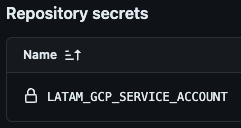

El mismo se obtiene en el Workflow `data_aggregation_pipeline.yml` como se muestra a continuación 
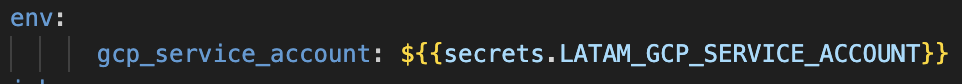

## Cargar las Credenciales desde la Cadena JSON
---
En esta sección, se cargan las credenciales de GCP desde una cadena JSON y se crean clientes autenticados para Google Cloud Storage y BigQuery. Este proceso es fundamental para interactuar de manera segura y autorizada con los servicios de GCP.

In [ ]:
storage_client, bigquery_client = create_gcp_clients()

## Operaciones con el Bucket de Google Cloud Storage
---

Se realizan varias operaciones con un bucket específico de Google Cloud Storage, incluyendo la descarga de un archivo Parquet a una ubicación temporal en el entorno de ejecución. Las mismas difieren del abordaje definido para ejecutar con el fichero `challenge.py` por la manera de explicación


In [ ]:
BUCKET_NAME = 'dl-latam-dev'
bucket = storage_client.bucket(BUCKET_NAME)

# Operaciones con el bucket
print(f"Bucket {BUCKET_NAME} está listo para usar.")

# Definir el archivo Parquet y la ruta temporal
FILE_NAME = 'mst_farmers_tweets.parquet'
TEMP_FILE_PATH = '/tmp/mst_farmers_tweets.parquet'
TABLE_NAME = "mst_tweets.mst_farmers_tweets"
# Descargar el archivo Parquet a un archivo temporal
blob = bucket.blob(FILE_NAME)
blob.download_to_filename(TEMP_FILE_PATH)

## Question 1
---

### Análisis de Tiempo en Archivos Parquet: Función `q1_time`

### Ventajas del Enfoque

1. **Uso de Pandas**:
    - **Facilidad de Uso**: Pandas proporciona una interfaz sencilla y poderosa para la manipulación de datos, lo que facilita la carga y transformación de grandes datasets.
    - **Eficiencia**: La función `pd.read_parquet` es eficiente en la carga de archivos Parquet, que están optimizados para consultas rápidas y almacenamiento compacto.

2. **Optimización Temporal**:
    - **Conversión de Fechas**: La conversión de la columna de fechas a objetos datetime y la extracción de solo la parte de la fecha permite un análisis más rápido y preciso de las fechas de los tweets.
    - **Contado de Frecuencia**: El uso de `value_counts` en Pandas es altamente optimizado para contar frecuencias, permitiendo identificar rápidamente las fechas con más actividad.

3. **Análisis de Usuarios**:
    - **Identificación del Usuario Top**: Para cada una de las fechas más activas, se utiliza `value_counts` nuevamente para identificar el usuario con más tweets. Este enfoque es eficiente y directo.

### Escalabilidad y Manejo de Crecimiento de Datos

Si el volumen de datos crece significativamente, hay varias estrategias que se pueden implementar para mantener la eficiencia y escalabilidad del análisis:

1. **Procesamiento en Chunks**:
    - **Lectura Parcial de Datos**: Pandas permite la lectura de archivos en chunks, lo que reduce el uso de memoria y permite procesar datasets más grandes que la memoria disponible.

    ```python
    for chunk in pd.read_parquet(file_path, chunksize=100000):
        # Procesar cada chunk individualmente
    ```

2. **Uso de Dask**:
    - **Distribución de Carga**: Dask es una biblioteca que extiende Pandas para trabajar con datos distribuidos y en paralelo. Usar Dask en lugar de Pandas puede mejorar significativamente el rendimiento con grandes volúmenes de datos.

    ```python
    import dask.dataframe as dd
    df = dd.read_parquet(file_path)
    ```

3. **Optimización de Consultas**:
    - **Indexación y Filtrado**: Asegurar que las columnas utilizadas para filtrar y agrupar (como la columna de fechas) estén indexadas puede acelerar las consultas.

4. **Almacenamiento en Formato Eficiente**:
    - **Parquet**: Continuar utilizando el formato Parquet, ya que es altamente eficiente para el almacenamiento y recuperación de datos. Considerar el particionado de archivos Parquet por fecha o usuario para mejorar la eficiencia de las consultas.

###  Descripción General
Este módulo contiene una función llamada q1_time diseñada para realizar análisis de tiempo en un archivo Parquet. Utiliza pandas para cargar y manipular datos, y devuelve una lista de tuplas que contiene las fechas más frecuentes y el usuario que realizó más tweets en cada fecha.
### Descripción de Componentes
- Importación de Librerías
- Función q1_time

Es la función principal que realiza el análisis de tiempo en el archivo Parquet.
Anotada con @profile para el perfilado de memoria.
Toma la ruta del archivo Parquet como entrada y devuelve una lista de tuplas con resultados.
- Carga de Datos

Utiliza pd.read_parquet para cargar el archivo Parquet en un DataFrame de pandas.
- Manipulación de Datos

Convierte la columna de fechas a formato datetime y extrae solo la fecha.
Cuenta el número de tweets por fecha y encuentra las 10 fechas más frecuentes.
- Análisis de Usuarios por Fecha

Para cada fecha más frecuente, encuentra el usuario que realizó más tweets.
Almacena la fecha y el usuario en una lista de resultados.
- Medición de Tiempo de Ejecución

Mide el tiempo de ejecución total de la función y lo imprime.


A continuación se muestran los resultados al ejecutar el proceso dentro de Github Actions
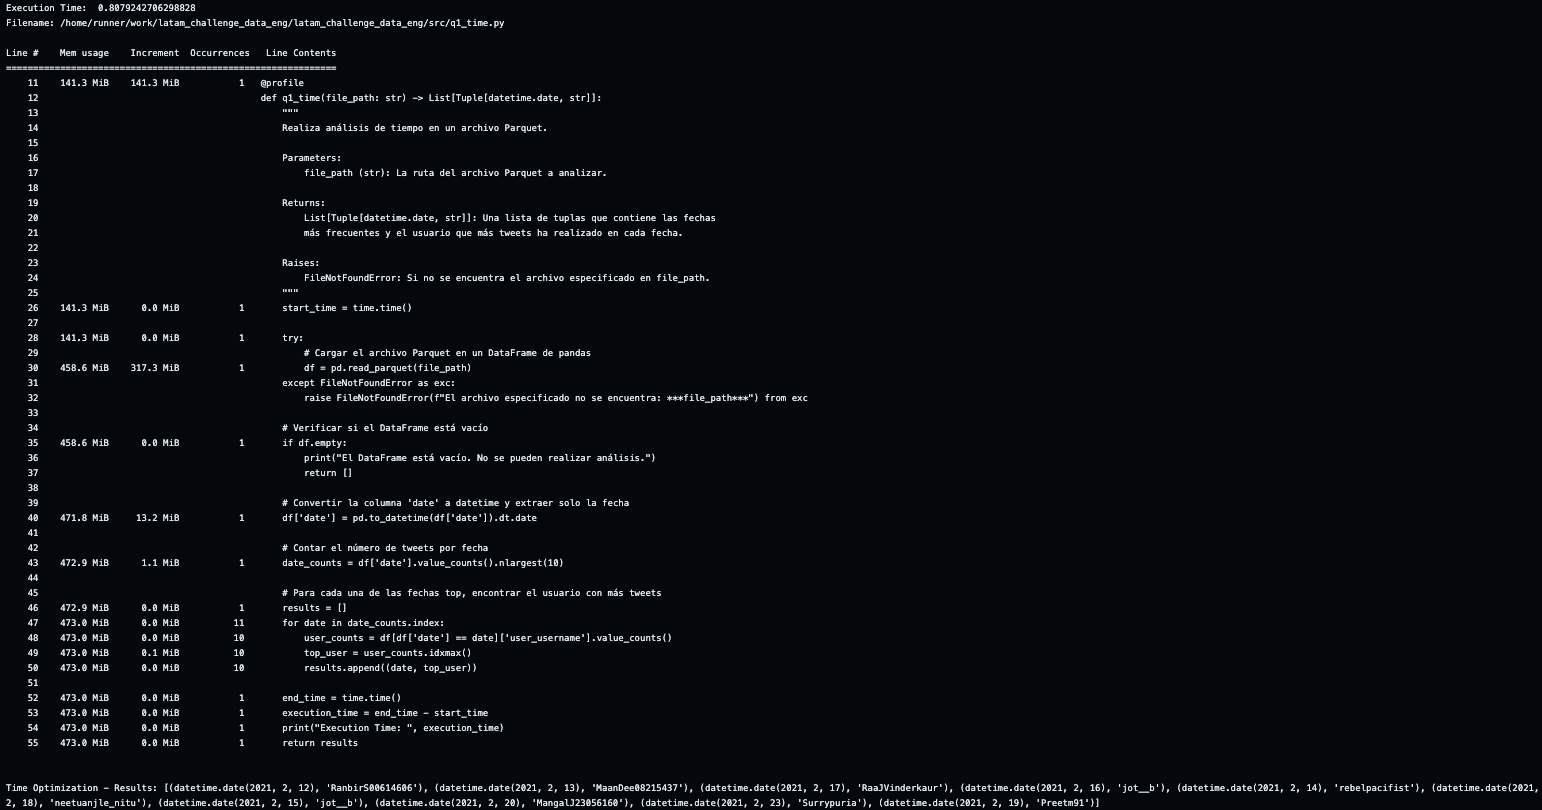

Siendo un tiempo de 0,80 segundos y 473MB

In [ ]:
results = q1_time(TEMP_FILE_PATH)
print(f"Time Optimization - Results: {results}")

### Análisis de Memoria en Archivos Parquet: Función `q1_memory`
### Ventajas del Enfoque

1. **Uso de Apache Spark**:
    - **Escalabilidad**: Spark está diseñado para procesar grandes volúmenes de datos en clústeres distribuidos, lo que permite manejar datasets que exceden la capacidad de memoria de una sola máquina.
    - **Eficiencia**: Spark realiza muchas optimizaciones internas, como la ejecución en memoria y la reutilización de datos intermedios, lo que puede acelerar significativamente el procesamiento de datos grandes.

### Escalabilidad y Manejo de Crecimiento de Datos

Si el volumen de datos crece significativamente, la arquitectura de Spark permite escalar horizontalmente, añadiendo más nodos al clúster para manejar la carga adicional. Además, hay varias estrategias que se pueden implementar para mejorar aún más la eficiencia y la escalabilidad:

1. **Ajustes de Configuración de Spark**:
    - **Configuración de Recursos**: Ajustar la cantidad de memoria y núcleos asignados a cada ejecutor en Spark puede mejorar el rendimiento.
    - **Persistencia de Datos**: Utilizar persistencia (`cache` o `persist`) para datos intermedios que se reutilizan en múltiples operaciones.

2. **Particionado de Datos**:
    - **Particionado Eficiente**: Asegurarse de que los datos estén particionados de manera eficiente para equilibrar la carga de trabajo entre los nodos del clúster.
    - **Reparticionamiento**: Usar reparticionamiento (`repartition`) cuando sea necesario para optimizar la distribución de datos antes de operaciones intensivas en memoria.

3. **Optimización de Consultas**:
    - **Filtro Previo**: Aplicar filtros tempranos para reducir la cantidad de datos procesados en etapas posteriores.
    - **Proyección de Columnas**: Seleccionar solo las columnas necesarias para el análisis, reduciendo el volumen de datos cargados en memoria.

###  Descripción General

Este módulo contiene una función llamada q1_memory diseñada para realizar análisis de memoria en un archivo Parquet utilizando PySpark. La función utiliza SparkSession para leer y procesar datos grandes de manera distribuida, y devuelve una lista de tuplas que contiene las fechas más frecuentes y el usuario que realizó más tweets en cada fecha.

### Descripción de Componentes
- Importación de Librerías
- Función q1_memory
- Creación de Sesión Spark

Crea una sesión de Spark utilizando SparkSession.builder.
- Lectura de Datos

Utiliza Spark para leer el archivo Parquet en un DataFrame de Spark.
-Manipulación y Filtrado de Datos

Convierte la columna de fechas a formato de fecha utilizando to_date.
Calcula el número de tweets por fecha y ordena por frecuencia.
Filtra el DataFrame original para incluir solo las fechas más frecuentes.
- Análisis de Usuarios por Fecha

Agrupa los datos por fecha y usuario, y calcula el número de tweets por usuario en cada fecha.
Utiliza funciones de ventana para obtener el usuario con más tweets por fecha.
- Recogida de Resultados

Recoge los resultados en una lista de tuplas.
- Medición del Tiempo de Ejecución

Es la función principal que realiza el análisis de memoria en el archivo Parquet utilizando PySpark.
Anotada con @profile para el perfilado de memoria.


A continuación se muestran los resultados al ejecutar el proceso dentro de Github Actions
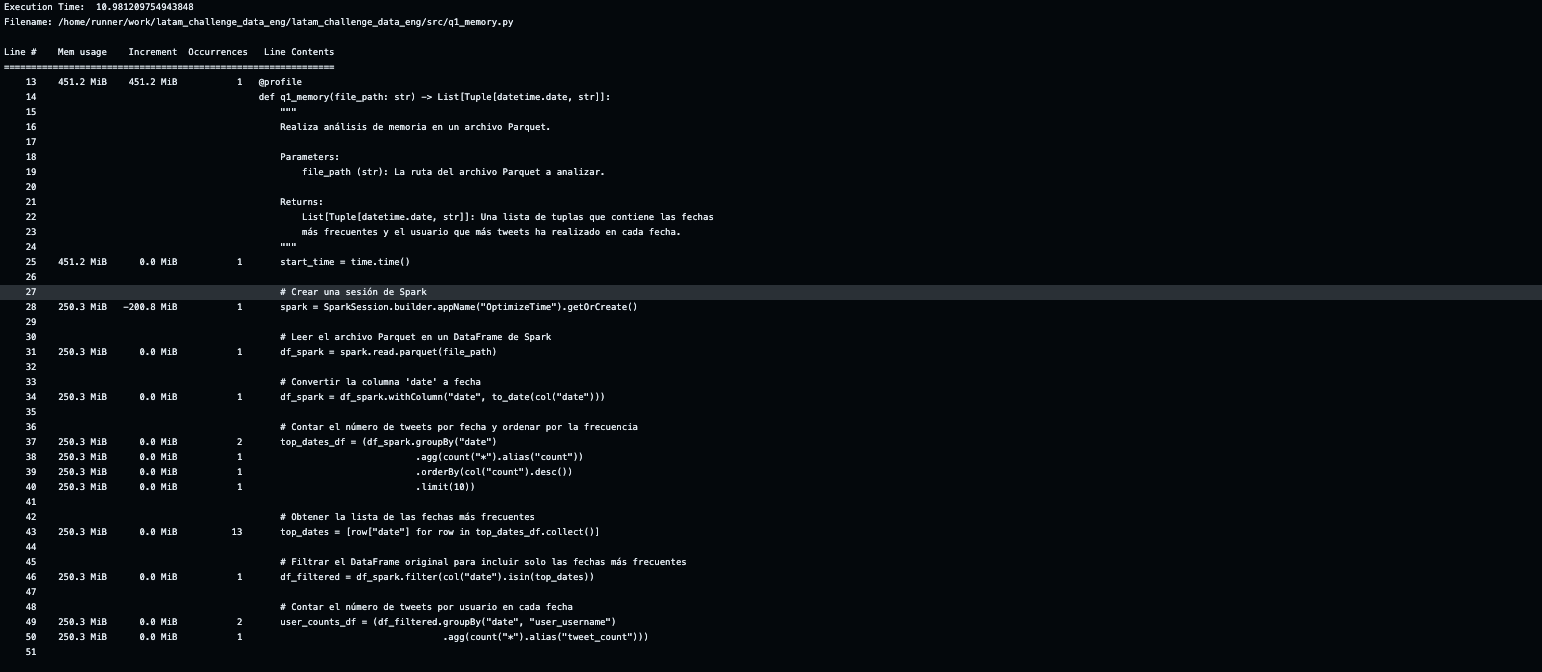
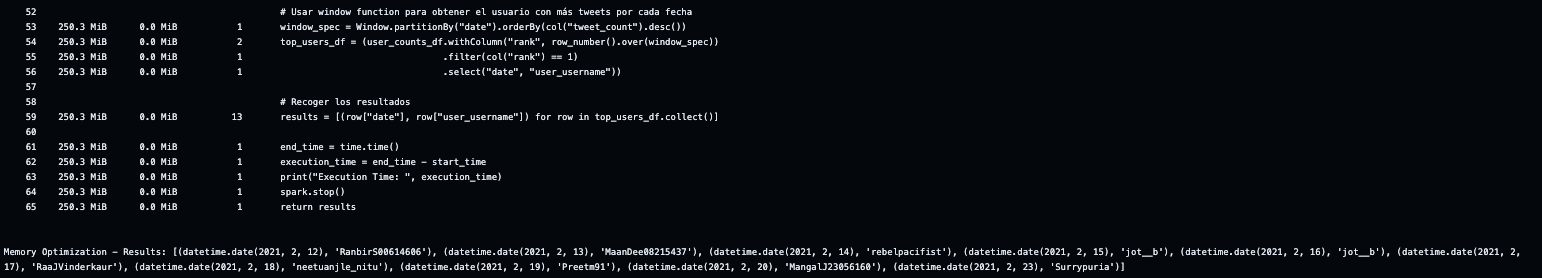
Siendo un tiempo de 10,98 segundos y 250,3MB

In [ ]:
results = q1_memory(TEMP_FILE_PATH)
print(f"Memory Optimization - Results: {results}")

## Question 2
---

## Consultas de Tiempo en BigQuery: Función `q2_time`

La función `q2_time` se utiliza para realizar consultas en BigQuery, extrayendo los 10 emojis más frecuentes en los tweets. Este enfoque aprovecha las capacidades de procesamiento masivo y escalable de BigQuery para manejar grandes volúmenes de datos de manera eficiente.

### Ventajas del Enfoque

1. **Uso de BigQuery**:
    - **Procesamiento Escalable**: BigQuery está diseñado para ejecutar consultas SQL a gran escala sobre grandes volúmenes de datos de manera rápida y eficiente.
    - **Facilidad de Uso**: La integración con Python permite ejecutar consultas SQL directamente desde el código, facilitando el análisis y manipulación de datos.

2. **Optimización Temporal y de Memoria**:
    - **Consultas SQL Optimizadas**: La consulta SQL está optimizada para extraer y contar emojis en los tweets, utilizando funciones avanzadas como `REGEXP_EXTRACT_ALL` y `UNNEST` para manejar datos complejos.

###  Descripción General

Este módulo contiene una función llamada q2_time diseñada para realizar consultas de memoria en BigQuery para obtener los 10 emojis más frecuentes en tweets.

### Descripción de Componentes
- Importación de Librerías
- Función q2_time

Es la función principal que realiza la consulta en BigQuery.
Anotada con @profile para el perfilado de memoria.
Toma la ruta del archivo en BigQuery como entrada y devuelve una lista de tuplas con resultados.
- Creación de Clientes de GCP

Utiliza la función create_gcp_clients para crear un cliente de BigQuery.
- Construcción y Ejecución de la Consulta

Define una consulta SQL para contar emojis en tweets.
Ejecuta la consulta utilizando bigquery_client.query.
- Procesamiento de Resultados

Recoge los resultados de la consulta y los devuelve como una lista de tuplas.
- Medición del Tiempo de Ejecución

A continuación se muestran los resultados al ejecutar el proceso dentro de Github Actions
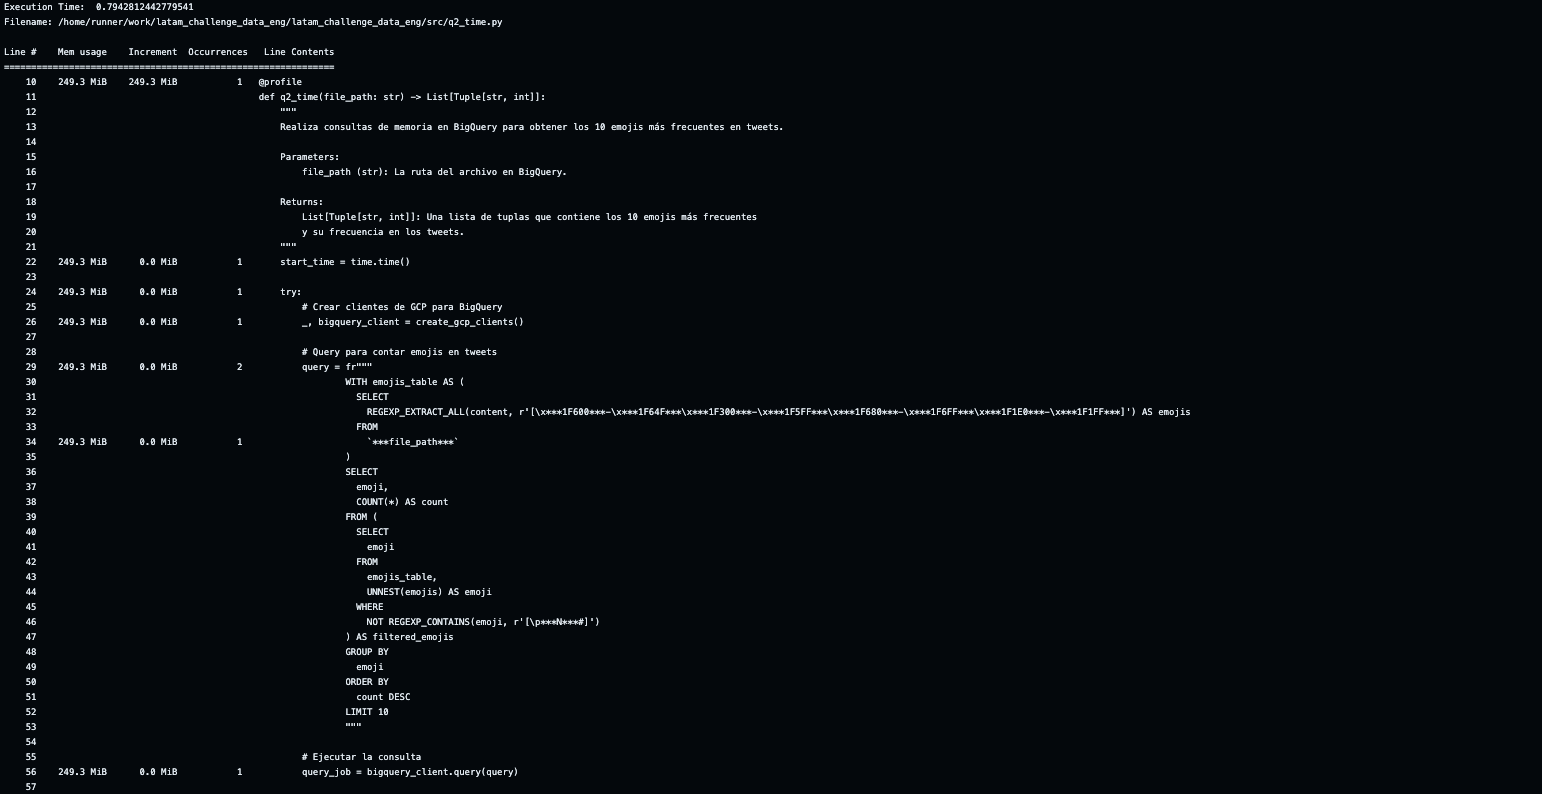
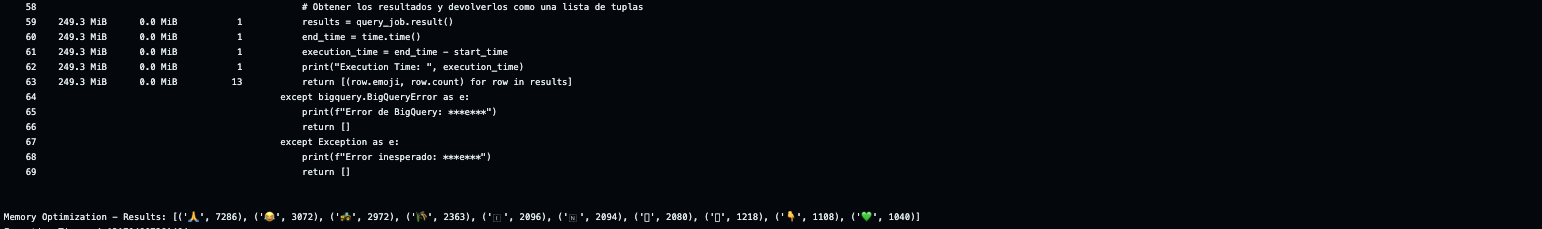
Siendo un tiempo de 0,79 segundos y 249,3 MB

In [ ]:
results = q2_time(TABLE_NAME)
print(f"Memory Optimization - Results: {results}")

## Consultas de Memoria en Archivos Parquet: Función `q2_memory`

### Ventajas del Enfoque

1. **Uso de Apache Spark**:
    - **Procesamiento Distribuido**: Spark permite distribuir el procesamiento de datos en múltiples nodos, lo que facilita el manejo de grandes volúmenes de datos de manera eficiente.
    - **Facilidad de Uso**: La interfaz de Spark en Python ofrece una API intuitiva para realizar operaciones complejas en grandes datasets.

2. **Optimización de Tiempo y Memoria**:
    - **Expresiones Regulares**: Utiliza expresiones regulares para extraer emojis de los tweets de manera eficiente, reduciendo el tiempo de procesamiento.
    - **Explode y GroupBy**: Utiliza operaciones como `explode` y `groupBy` para transformar los datos y calcular la frecuencia de cada emoji de manera efectiva.
##  Descripción General

Este módulo contiene una función llamada q2_memory diseñada para realizar consultas de tiempo en un archivo Parquet para obtener los 10 emojis más frecuentes. Utiliza PySpark para manipular y procesar los datos del archivo Parquet y devuelve una lista de tuplas que contiene los emojis más frecuentes y su frecuencia.

### Descripción de Componentes
- Importación de Librerías
- Función q2_memory

Es la función principal que realiza la consulta de tiempo en el archivo Parquet.
Anotada con @profile para el perfilado de memoria.
Toma la ruta del archivo Parquet como entrada y devuelve una lista de tuplas con resultados.
- Creación de la Sesión Spark
- Lectura y Preprocesamiento de Datos
- Manipulación y Análisis de Datos

Divide las cadenas de emojis en caracteres individuales y los explota para tener un emoji por fila.
Cuenta la frecuencia de cada emoji y selecciona los 10 emojis más frecuentes.
- Recogida de Resultados
Recoge los resultados de la consulta y los devuelve como una lista de tuplas.
- Medición del Tiempo de Ejecución

A continuación se muestran los resultados al ejecutar el proceso dentro de Github Actions
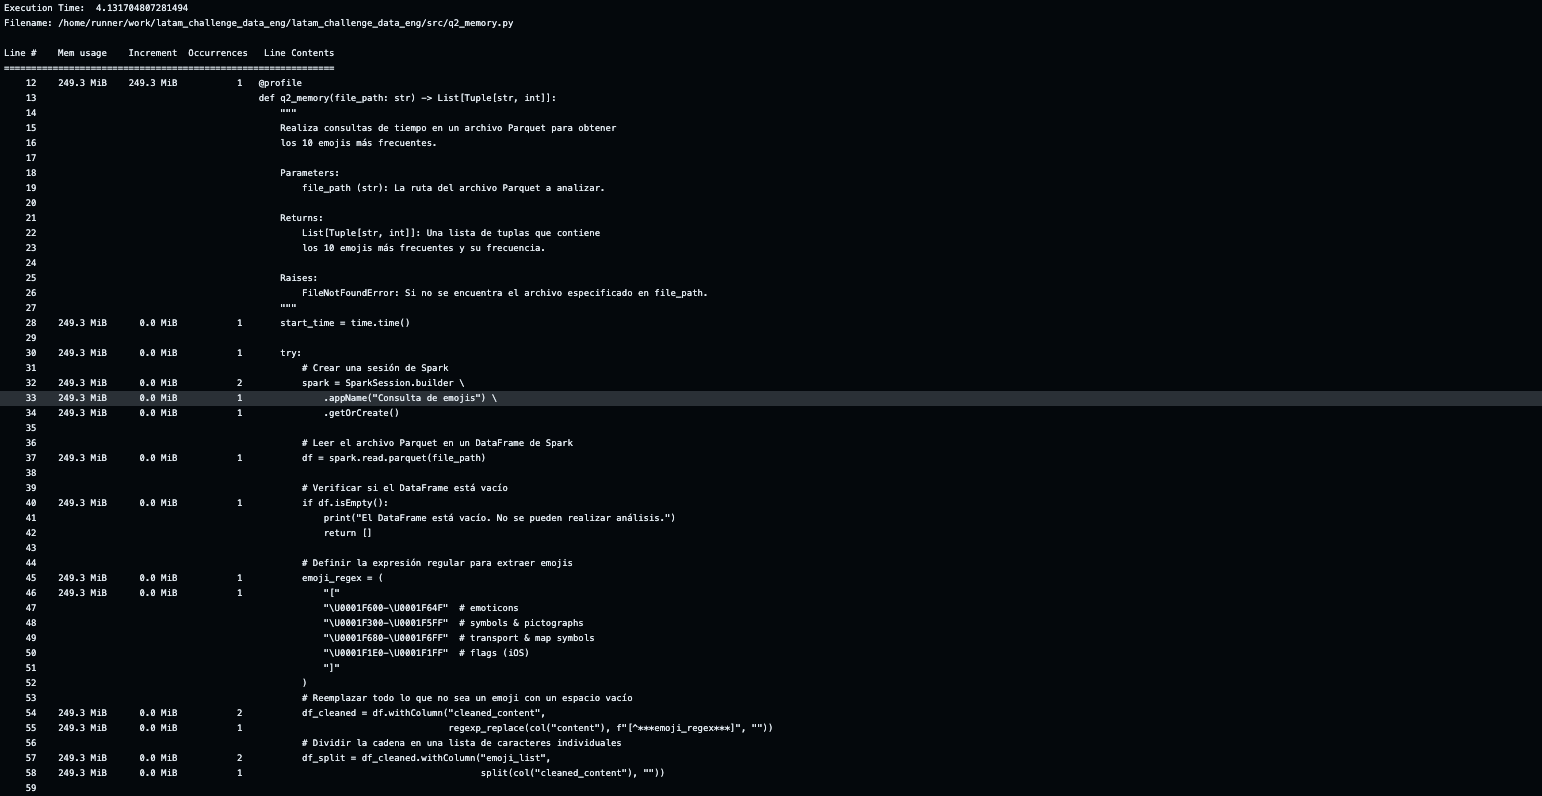
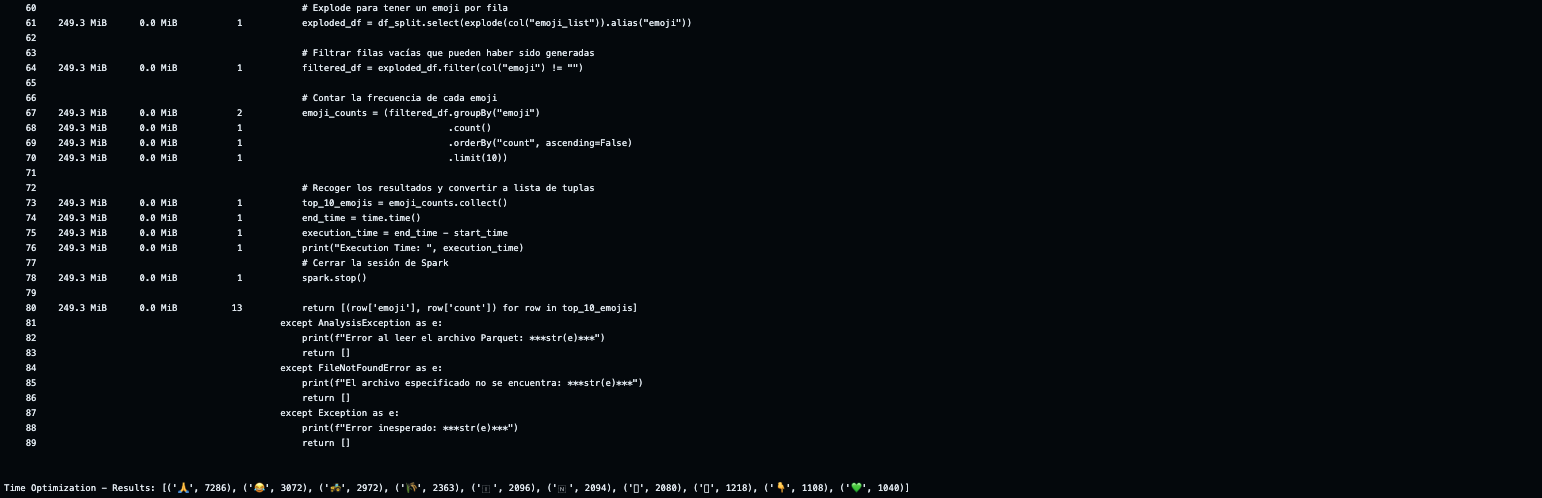
Siendo un tiempo de 4,13 segundos y 249,3 MB

In [ ]:
results = q2_memory(TEMP_FILE_PATH)
print(f"Time Optimization - Results: {results}")

**NOTA: Es importante identificar que el uso de memoria se mantiene un función del uso de Bigquery y Spark, es importante conocer las respectivas implicaciones de procesar la información en la instancia y hacer uso de servicios externos.**

## El top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos.

## Análisis de Tiempo en Archivos Parquet: Función `q3_time`


### Ventajas del Enfoque

1. **Eficiencia en el Procesamiento de Datos**:
    - **ParquetDataset**: Utiliza la clase `ParquetDataset` de PyArrow para leer fragmentos de archivos Parquet de manera eficiente, minimizando la carga en la memoria.
    - **Procesamiento Distribuido**: Procesa cada fragmento de Parquet de forma independiente, lo que permite aprovechar la capacidad de procesamiento paralelo y distribuido.

2. **Manejo de Texto**:
    - **Función de Extracción de Menciones**: La función `extract_mentions` utiliza expresiones regulares para extraer menciones de texto de manera eficiente, lo que facilita el análisis de texto no estructurado.
    - **Conteo de Menciones**: Utiliza un contador para mantener un registro de la frecuencia de cada mención, lo que simplifica el proceso de identificar las menciones más comunes.

3. **Escalabilidad y Rendimiento**:
    - **Optimización de Memoria**: Procesa los datos de manera incremental, lo que reduce la carga en la memoria y permite manejar conjuntos de datos de gran tamaño de manera eficiente.
    - **Complejidad Temporal**: Utiliza técnicas de programación eficientes para minimizar el tiempo de ejecución, lo que garantiza un rendimiento óptimo incluso para grandes volúmenes de datos.


In [ ]:
results = q3_time(TABLE_NAME)
print(f"Time Optimization - Results: {results}")

## Consultas de Memoria en BigQuery: Función `q3_memory`

### Ventajas del Enfoque

1. **Eficiencia en el Procesamiento de Datos**:
    - **BigQuery como Servicio de Análisis**: Utiliza BigQuery como un servicio de análisis gestionado que ofrece una alta escalabilidad y rendimiento para procesar grandes volúmenes de datos de manera eficiente.
    - **Consulta SQL Optimizada**: La consulta SQL está optimizada para contar los nombres de usuario más mencionados de manera eficiente, aprovechando las funciones integradas de BigQuery para manipular y analizar datos estructurados.

2. **Manejo de Datos Estructurados**:
    - **Extracción de Nombres de Usuario**: Utiliza expresiones regulares en la consulta SQL para extraer y contar los nombres de usuario mencionados en los tweets, lo que simplifica el proceso de identificación de los usuarios más mencionados.

3. **Complejidad Temporal y Escalabilidad**:
    - **Tiempo de Ejecución Eficiente**: La consulta está diseñada para minimizar el tiempo de ejecución, lo que garantiza un procesamiento rápido incluso para grandes conjuntos de datos.
    - **Escalabilidad Automática**: BigQuery ofrece escalabilidad automática, lo que significa que puede manejar un aumento en el volumen de datos sin necesidad de ajustes manuales.

In [ ]:
results = q3_memory(TABLE_NAME)
print(f"Time Optimization - Results: {results}")